<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn')
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

industry=pd.read_excel('insurance industry.xlsx')


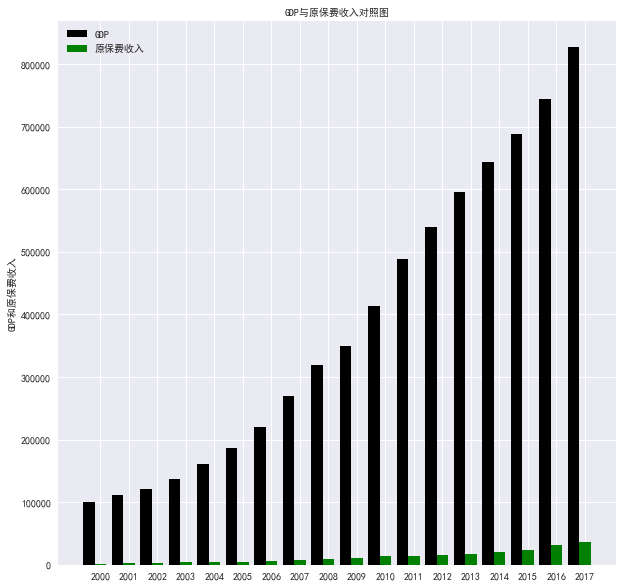

In [3]:
industry.columns=['year','GDP','GDP_rate','premium','premium_rate','deepth','density','population',
                  'employers','asset','payment','asset_rate','net_asset','net_asset_rate','companies']
fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(111)

x =list(range(len(industry['year'])))
total_width, n = 0.8, 2
width = total_width / n

bar1=plt.bar(x,industry['GDP'],width=width, label='GDP',fc = 'k')

for i in range(len(x)):
    x[i] = x[i] + width
    
bar2=plt.bar(x,industry['premium'],width=width, label='保费收入',fc = 'g',tick_label=[str(x) for x in industry['year']])

ax1.set_ylabel('GDP和原保费收入',fontproperties="SimHei")
ax1.set_title("GDP与原保费收入对照图",fontproperties="SimHei")
ax1.legend([bar1,bar2],['GDP','原保费收入'])


plt.show()



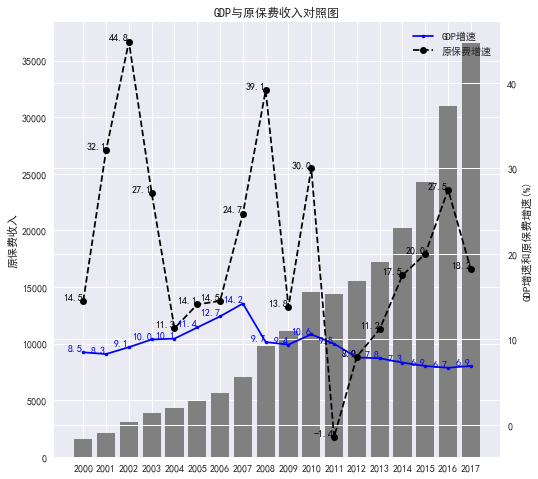

In [5]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ind=np.arange(len(industry['year']))
ax1.bar(industry['year'],industry['premium'],width=0.8, label='premium',fc = 'grey',tick_label=[str(x) for x in industry['year']])

ax1.set_ylabel('原保费收入')
ax1.set_title("GDP与原保费收入对照图")
ax2 = ax1.twinx()  # this is the important function
line1=ax2.plot(industry['year'],industry['GDP_rate'], 'b.-',label='GDP增速')
for i,j in zip(industry['year'],industry['GDP_rate']):
    ax2.text(i,j,round(j,2),fontsize=10,ha='right',va='bottom',color='blue')
    
line2=ax2.plot(industry['year'],industry['premium_rate'],'ko--',label='原保费增速')
for i,j in zip(industry['year'],industry['premium_rate']):
    ax2.text(i,j,round(j,2),fontsize=10,ha='right',va='bottom',color='black')
    
ax2.set_ylabel('GDP增速和原保费增速(%)')
#ax2.set_xlabel('年')
plt.legend()

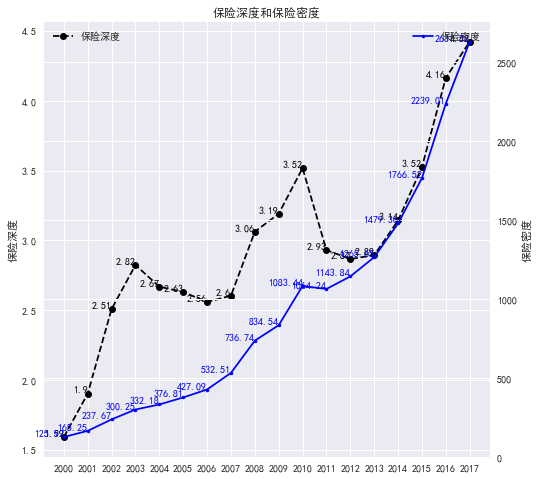

In [6]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

line1=ax1.plot(industry['year'],industry['deepth'],'ko--',label='保险深度')
ax1.legend(loc=0)
for i,j in zip(industry['year'],industry['deepth']):
    ax1.text(i,j,round(j,2),fontsize=10,ha='right',va='bottom',color='black')
ax1.set_ylabel('保险深度')
ax1.set_title("保险深度和保险密度")
ax2 = ax1.twinx()  # this is the important function
line2=ax2.plot(industry['year'],industry['density'], 'b.-',label='保险密度')
for i,j in zip(industry['year'],industry['density']):
    ax2.text(i,j,round(j,2),fontsize=10,ha='right',va='bottom',color='blue')

ax2.set_ylabel('保险密度')
ax2.set_xticks(industry['year'])
ax2.legend(loc=1)

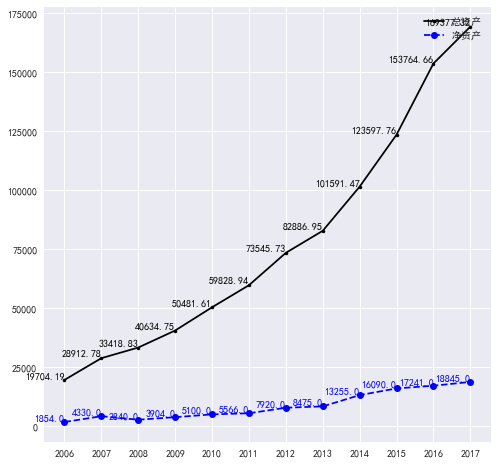

In [16]:
import numpy as np
year_asset=np.arange(2006,2018)
year_company=np.arange(2003,2018)

asset=industry['asset'][6:]
net_asset=industry['net_asset'][6:]
employers=industry['employers'][3:]
companies=industry['companies'][3:]
plt.figure(figsize=(8,8))
plt.plot(year_asset,asset,'k.-',label='总资产')
for i,j in zip(year_asset,asset):
    plt.text(i,j,j,fontsize=10,ha='right',va='bottom',color='black')
plt.plot(year_asset,net_asset,'bo--',label='净资产')
for i,j in zip(year_asset,net_asset):
    plt.text(i,j,j,fontsize=10,ha='right',va='bottom',color='blue')
plt.legend(loc=1)
plt.xticks(year_asset)
plt.show()

In [18]:
?plt.text

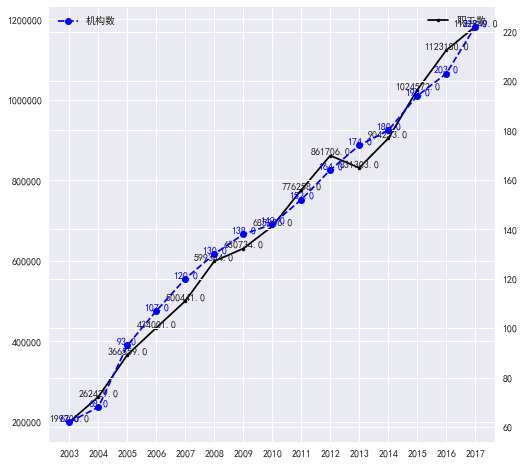

In [12]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(111)
line1=ax1.plot(year_company,employers,'k.-',label='职工数')
ax1.legend(loc=1)
for i,j in zip(year_company,employers):
    ax1.text(i,j,j,ha='center', va='bottom', fontsize=10)

ax2=ax1.twinx()
line2=ax2.plot(year_company,companies,'bo--',label='机构数')
ax2.legend(loc=0)
for i,j in zip(year_company,companies):
    ax2.text(i,j,j,ha='center', va='bottom', fontsize=10,color='blue')
plt.xticks(year_company)
plt.show()